In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import trange
from matplotlib.pyplot import figure
import json
import pandas as pd

In [3]:
# load dataset, params, and results

# load model run to evaluate 

dir = "~/PhD/Intel-Neuromorphic-Research-Project/output/SC_shuffle_off_single_shuffle_on/"
if os.path.isfile(os.path.expanduser(dir + "hidden_spike_counts_unfiltered.npy")):
        hidden_spike_counts = np.load(os.path.expanduser(dir + "hidden_spike_counts_unfiltered.npy"))
        
output = pd.read_csv(os.path.expanduser(dir + "train_output.csv"))

with open(os.path.expanduser(dir + "params.json"), "r") as f:
        params = json.load(f)
        
# load dataset
x_train = np.load(os.path.expanduser(params.get("dataset_directory")) + "training_x_data.npy")
y_train = np.load(os.path.expanduser(params.get("dataset_directory")) + "training_y_data.npy")

# adding validation data if exists
validation_images = np.array([])
validation_labels = np.array([])
if os.path.isfile(os.path.expanduser(params.get("dataset_directory")) + "validation_y_data.npy"):
        print("!! validation dataset loaded successfully")
        x_validation = np.load(os.path.expanduser(params.get("dataset_directory")) + "validation_x_data.npy")
        y_validation = np.load(os.path.expanduser(params.get("dataset_directory")) + "validation_y_data.npy")

        validation_images = np.swapaxes(x_validation, 1, 2) 
        validation_images = validation_images + abs(np.floor(validation_images.min()))

        validation_labels = y_validation

!! validation dataset loaded successfully


In [5]:
# epoch 0, population 0 to 1 -> e0p01
e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + "/49-Conn_Pop1_Pop2-g.npy"))

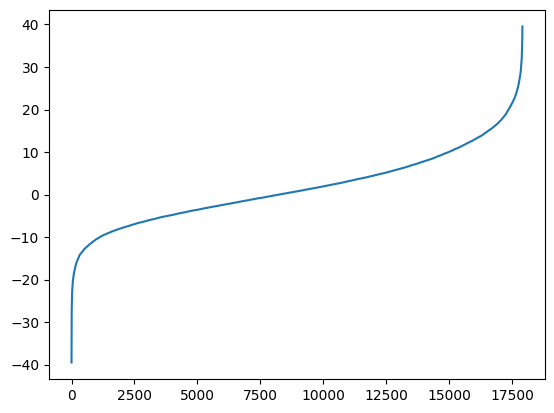

In [8]:
plt.plot(np.sort(e0p01))
plt.show()

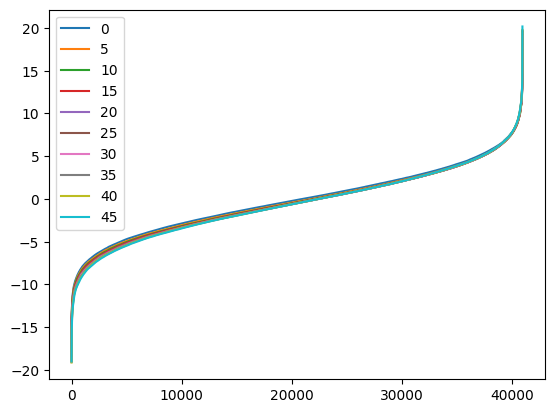

In [9]:
for i in range(0, 50, 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{i}-Conn_Pop0_Pop1-g.npy"))
    plt.plot(np.sort(e0p01), label = i)
plt.legend()
plt.show()

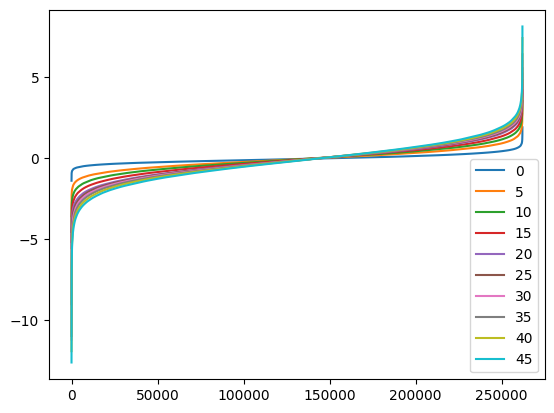

In [10]:
for i in range(0, 50, 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{i}-Conn_Pop1_Pop1-g.npy"))
    plt.plot(np.sort(e0p01), label = i)
plt.legend()
plt.show()

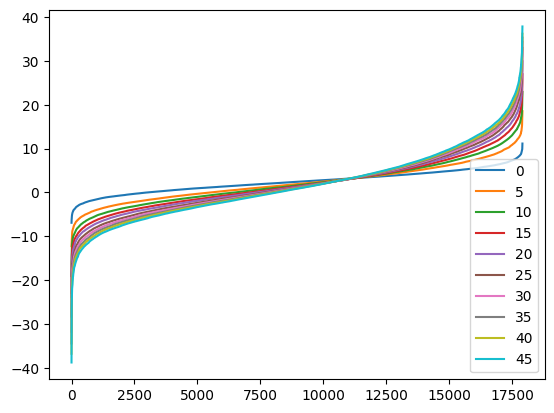

In [11]:
for i in range(0, 50, 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{i}-Conn_Pop1_Pop2-g.npy"))
    plt.plot(np.sort(e0p01), label = i)
plt.legend()
plt.show()

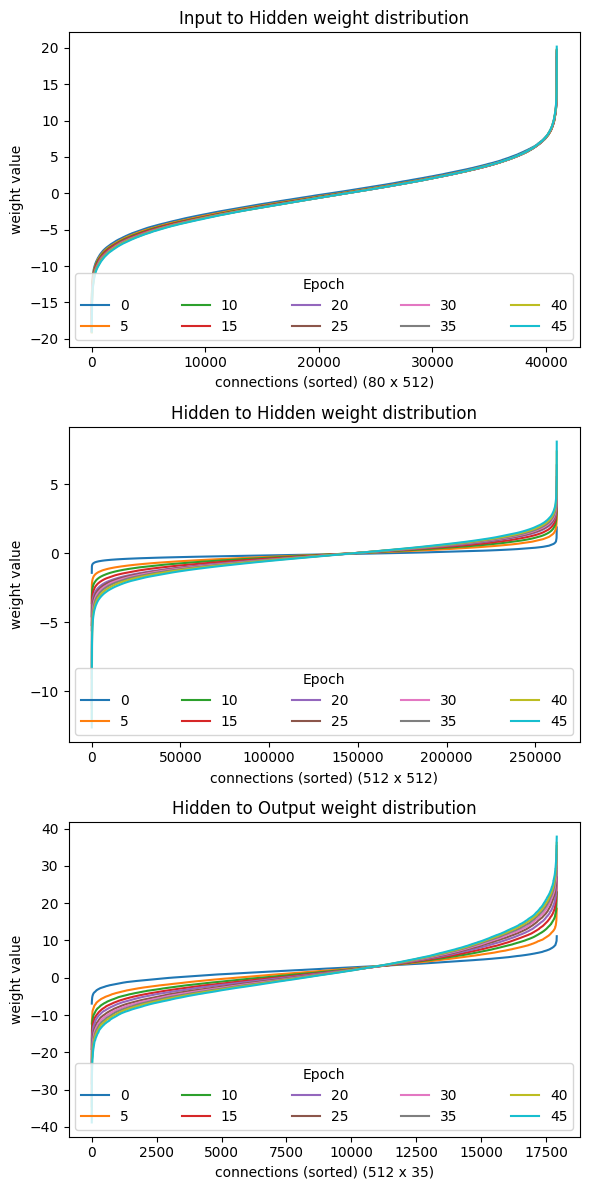

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6,12))

for i in range(0, params.get("NUM_EPOCH"), 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{i}-Conn_Pop0_Pop1-g.npy"))
    ax1.plot(np.sort(e0p01), label = i)
ax1.set_ylabel("weight value")
ax1.set_xlabel("connections (sorted) ({} x {})".format(params.get("NUM_INPUT"), params.get("NUM_HIDDEN")))
ax1.set_title("Input to Hidden weight distribution")

for i in range(0, params.get("NUM_EPOCH"), 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{i}-Conn_Pop1_Pop1-g.npy"))
    ax2.plot(np.sort(e0p01), label = i)
ax2.set_ylabel("weight value")
ax2.set_xlabel("connections (sorted) ({} x {})".format(params.get("NUM_HIDDEN"), params.get("NUM_HIDDEN")))
ax2.set_title("Hidden to Hidden weight distribution")

for i in range(0, params.get("NUM_EPOCH"), 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{i}-Conn_Pop1_Pop2-g.npy"))
    ax3.plot(np.sort(e0p01), label = i)
ax3.set_ylabel("weight value")
ax3.set_xlabel("connections (sorted) ({} x {})".format(params.get("NUM_HIDDEN"), params.get("NUM_OUTPUT")))
ax3.set_title("Hidden to Output weight distribution")

ax1.legend(loc = "lower center", mode = "expand", ncol = 5, title="Epoch")
ax2.legend(loc = "lower center", mode = "expand", ncol = 5, title="Epoch")
ax3.legend(loc = "lower center", mode = "expand", ncol = 5, title="Epoch")
fig.tight_layout()
plt.show()

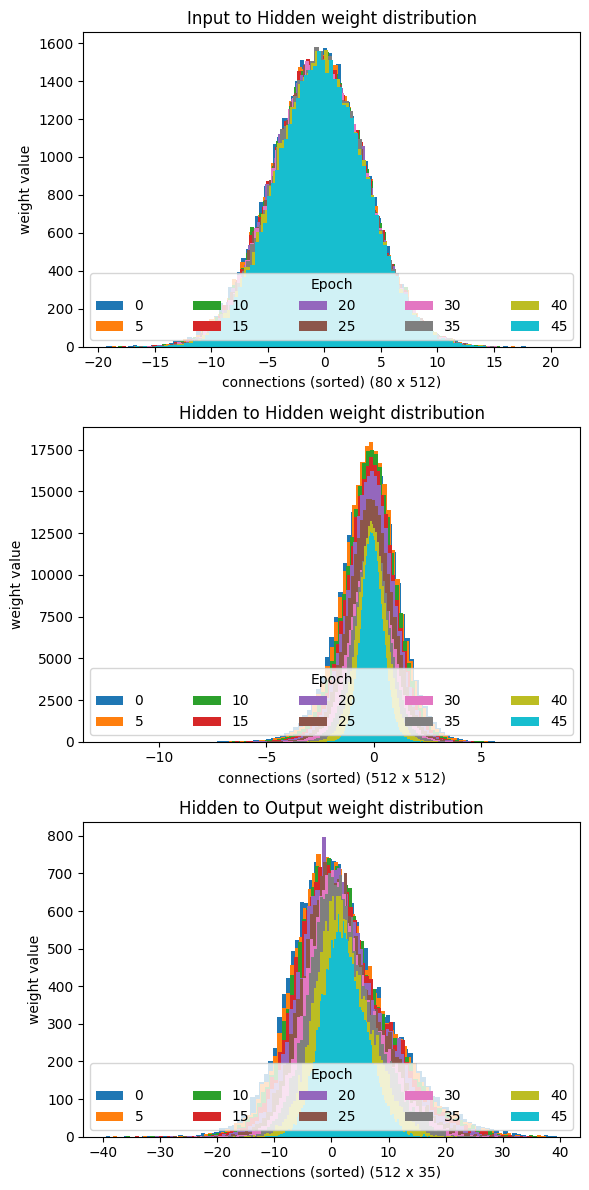

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6,12))

for i in range(0, params.get("NUM_EPOCH"), 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{49 - i}-Conn_Pop0_Pop1-g.npy"))
    ax1.hist(e0p01, 100, label = i)
ax1.set_ylabel("weight value")
ax1.set_xlabel("connections (sorted) ({} x {})".format(params.get("NUM_INPUT"), params.get("NUM_HIDDEN")))
ax1.set_title("Input to Hidden weight distribution")

for i in range(0, params.get("NUM_EPOCH"), 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{49 - i}-Conn_Pop1_Pop1-g.npy"))
    ax2.hist(e0p01, 100, label = i)
ax2.set_ylabel("weight value")
ax2.set_xlabel("connections (sorted) ({} x {})".format(params.get("NUM_HIDDEN"), params.get("NUM_HIDDEN")))
ax2.set_title("Hidden to Hidden weight distribution")

for i in range(0, params.get("NUM_EPOCH"), 5):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{49 - i}-Conn_Pop1_Pop2-g.npy"))
    ax3.hist(e0p01, 100, label = i)
ax3.set_ylabel("weight value")
ax3.set_xlabel("connections (sorted) ({} x {})".format(params.get("NUM_HIDDEN"), params.get("NUM_OUTPUT")))
ax3.set_title("Hidden to Output weight distribution")

ax1.legend(loc = "lower center", mode = "expand", ncol = 5, title="Epoch")
ax2.legend(loc = "lower center", mode = "expand", ncol = 5, title="Epoch")
ax3.legend(loc = "lower center", mode = "expand", ncol = 5, title="Epoch")
fig.tight_layout()
plt.show()

Axes(0.672059,0.26661;0.227941x0.0652542)


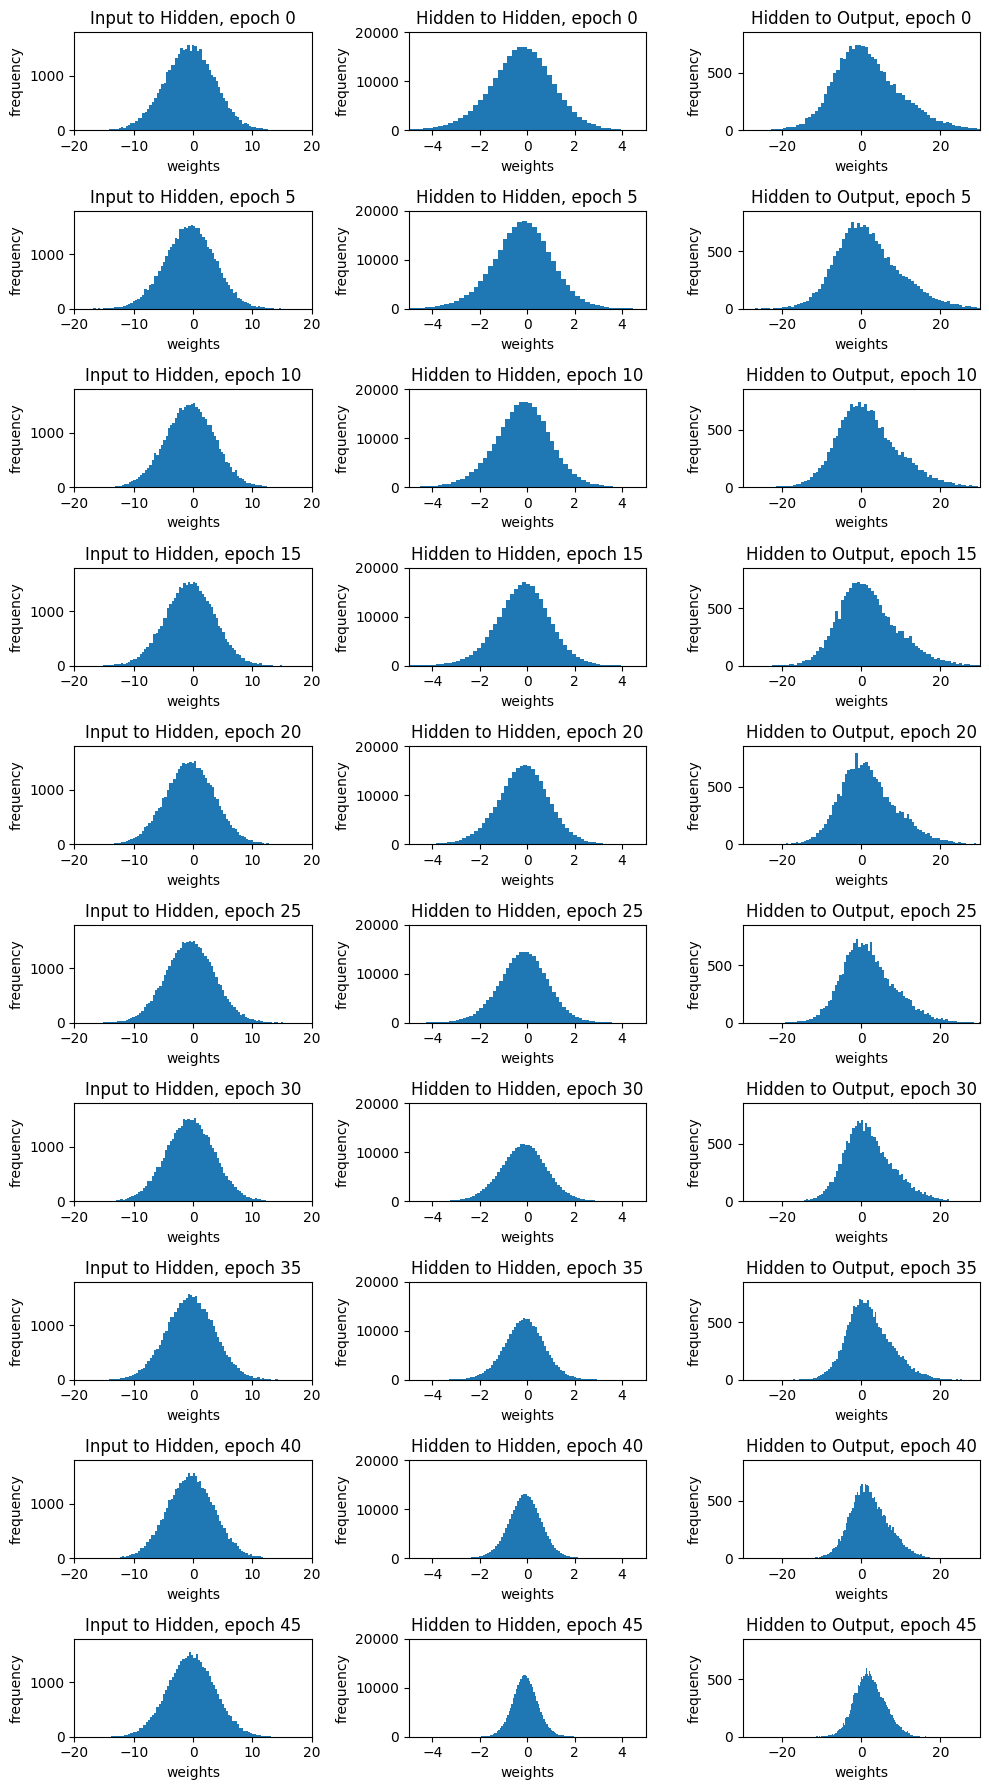

In [87]:
fig, axs = plt.subplots(10, 3, figsize=(10, 18))

for index, epoch in enumerate(range(0, params.get("NUM_EPOCH"), 5)):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{49 - epoch}-Conn_Pop0_Pop1-g.npy"))
    axs[index, 0].hist(e0p01, 100, label = epoch)
    axs[index, 0].set_xlim(-20, 20)
    axs[index, 0].set_ylim(0, 1800)
    axs[index, 0].set_ylabel("frequency")
    axs[index, 0].set_xlabel("weights")
    axs[index, 0].set_title("Input to Hidden, epoch {}".format(epoch))

for index, epoch in enumerate(range(0, params.get("NUM_EPOCH"), 5)):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{49 - epoch}-Conn_Pop1_Pop1-g.npy"))
    axs[index, 1].hist(e0p01, 100, label = epoch)
    axs[index, 1].set_xlim(-5, 5)
    axs[index, 1].set_ylim(0, 20000)
    axs[index, 1].set_ylabel("frequency")
    axs[index, 1].set_xlabel("weights")
    axs[index, 1].set_title("Hidden to Hidden, epoch {}".format(epoch))

for index, epoch in enumerate(range(0, params.get("NUM_EPOCH"), 5)):
    e0p01 = np.load(os.path.expanduser(dir + params.get("model_description") + f"/{49 - epoch}-Conn_Pop1_Pop2-g.npy"))
    axs[index, 2].hist(e0p01, 100, label = epoch)
    axs[index, 2].set_xlim(-30, 30)
    axs[index, 2].set_ylim(0, 850)
    axs[index, 2].set_ylabel("frequency")
    axs[index, 2].set_xlabel("weights")
    axs[index, 2].set_title("Hidden to Output, epoch {}".format(epoch))

plt.tight_layout()
plt.show()